In [2]:
from dotenv import load_dotenv
if(load_dotenv(".env") == False):
    print("No .env file found")
from datasets import load_dataset
from transformers import AutoModel
import matplotlib.pyplot as plt
import numpy as np


def dataset_distribution_plot(dataset, name, id, bins, plot_range):
    """
    plot the distribution of word amount per sentence
    dataset: the dataset to plot
    name: the name of the dataset BigCities
    id: the id of the dataset, eg. big_cities
    """

    word_amounts = []
    for i in range(len(dataset["test"]["sentences"])):
        word_amounts += [
            len(sentence.split()) for sentence in dataset["test"]["sentences"][i]
        ]

    plt.rcParams["font.family"] = "Inter"
    plt.rcParams["axes.prop_cycle"] = plt.cycler(
        "color", ["#4269D0", "#3BA951", "#EFB117", "#FF725C"]
    )

    # create a histogram, limit x axis to 20000 and use 16 bins
    plt.hist(word_amounts, bins=bins, range=plot_range)
    # label the axes
    plt.xlabel("Words per document")
    plt.ylabel("Document count")

    plt.title("Distribution of words per document in the " + name + " dataset")

    plt.savefig("results/clustering/" + id + "_distribution.png", dpi=300)

    plt.show()

In [3]:
big_patent_dataset = load_dataset("jinaai/big-patent-clustering")
wiki_cities_dataset = load_dataset("jinaai/cities_wiki_clustering")

/Users/malte/miniconda3/envs/embenchmark2/lib/python3.9/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by mode='default'.
  table = cls._concat_blocks(blocks, axis=0)


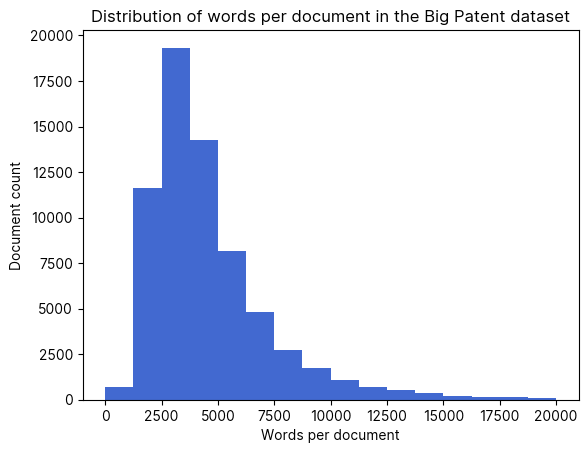

In [4]:
dataset_distribution_plot(big_patent_dataset, "Big Patent", "big_patent", 16, (0, 20000))

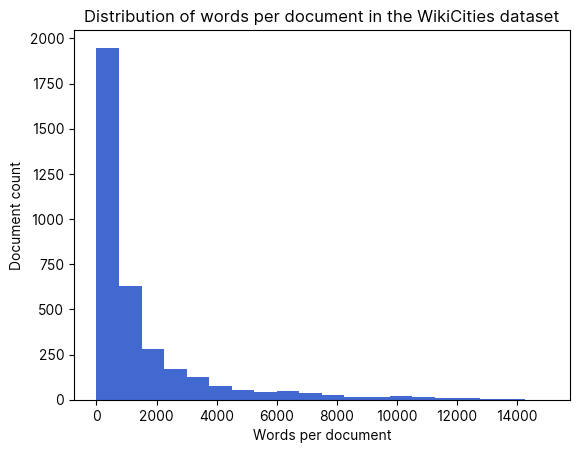

In [5]:
dataset_distribution_plot(wiki_cities_dataset, "WikiCities", "wiki_cities", 20, (0, 15000))